# Machine learning and RNA PolII distribution of foci

## Mariamawit Ashenafi



## Introduction

RNA PolII: Enzyme implicated in gene expression 


# Wetlab methods

- Nuclei isolation and conservation
    - Extract nuclei from Arabidopsis leaves
    - Gel embedding of nuclei on slides
- Immunostaining - antibodies (add links)
    - RNA PolII NP :
    - RNA PolII Ser5P :
    - RNA PolII Ser2P :
    - DNA : stained in DAPI 
- Image acquisition _STED microscopy
    - Objectif: 63 Glycerol
    -  



# Is there a distribution pattern of the foci?

- In regards to DNA amount 
- In regards to chromocenters, nucleolus and nucleus center of mass(approximation to periphery)
- In regards to other RNA PolII foci

## Image processing 

(Plugins are developped in python to collect features from 3D images and export them in .csv files)

1. List plugins and their description  
2. 

### Features
(.csv files are then processed in R to manage the data better)

1. Features : 
2. Label : 

In [1]:
### python packages required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn-white')
from sklearn import metrics
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble, preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
### make plot appear inline
% matplotlib inline

C:\Users\Pheonix\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Getting the data

The .csv files resulting from CalculateDistance.R are in 5 different folders.
This was necessary, because in R there is a limited amount of space available for a vector.
So here, try to bind all files in one table

In [2]:
FilePath = "Z:/Result0309/s20_Wt/"+str(1)+"/XTCountSpotPerShell_Result/MLResult.csv"
Result = pd.read_csv(FilePath)
Result.head()

,SpotId,FociType,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,...,Nucleolus,MeanCC,ClosestCC,VolumeCC,IntensityCh0CC,IntensityCh1CC,IntensityCh2CC,IntensityCh3CC,SegmentChannel,Mask
0,1,1,0.179932,0.179932,0.179932,NaN,NaN,NaN,0.134319,0.134319,...,2.226891,2.071436,0.246185,1.075296,0.639146,-0.017606,0.344968,0.434392,1.066668,-1
1,2,1,0.179932,0.179932,0.179932,NaN,NaN,NaN,NaN,NaN,...,2.225762,2.126999,0.195587,1.075296,0.639146,-0.017606,0.344968,0.434392,0.915853,-1
2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,0.181028,0.181028,...,2.227121,2.222762,0.070729,1.075296,0.639146,-0.017606,0.344968,0.434392,0.915853,-1
3,4,1,NaN,NaN,NaN,NaN,NaN,NaN,0.128075,0.128075,...,1.645128,1.667099,-0.554193,1.075296,0.639146,-0.017606,0.344968,0.434392,1.066668,-1
4,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.650743,1.798901,-0.886583,1.075296,0.639146,-0.017606,0.344968,0.434392,1.066668,-1


In [147]:
Result=pd.DataFrame()
for p in range(1,5):
    FilePath = "Z:/Result0309/s20_Wt/"+str(p)+"/XTCountSpotPerShell_Result/MLResult.csv"
    features = pd.read_csv(FilePath)
    Result=Result.append(features)

In [3]:
Result.to_csv("Z:/Result0309/s20_Wt/MLResultObs.csv")
print(Result.shape)

In [2]:
FilePath = "Z:/Result0309/s20_Wt/MLResultObs.csv"
Result = pd.read_csv(FilePath)
Result.shape

(2485727, 39)

# Feature normalization

1. Distances, intensities and CC volumes have already been scaled per image
2. Nucleus and and nucleolus features though have not been scaled yet 
3. Plot data and see if Log transforming the features is necessary

In [4]:
#del features
Result.columns

Index([u'Unnamed: 0', u'SpotId', u'FociType', u'N1Volume', u'N1IntensityCh0',
       u'N1IntensityCh1', u'N1IntensityCh2', u'N1IntensityCh3', u'N2Volume',
       u'N2IntensityCh0', u'N2IntensityCh1', u'N2IntensityCh2',
       u'N2IntensityCh3', u'File', u'IntensityCh0', u'IntensityCh1',
       u'IntensityCh2', u'IntensityCh3', u'Sp1NumbSpot', u'Sp1MeanDist',
       u'Sp1MinDist', u'Sp1MaxDist', u'Sp2NumbSpot', u'Sp2MeanDist',
       u'Sp2MinDist', u'Sp2MaxDist', u'Sp3NumbSpot', u'Sp3MeanDist',
       u'Sp3MinDist', u'Sp3MaxDist', u'Nucleus', u'Nucleolus', u'MeanCC',
       u'ClosestCC', u'VolumeCC', u'IntensityCh0CC', u'IntensityCh1CC',
       u'IntensityCh2CC', u'IntensityCh3CC'],
      dtype='object')

##### Scale nucleus and nuclei features 
(Other columns have already been scaled by image))

In [5]:
newdf = pd.DataFrame(preprocessing.scale(Result.iloc[:,3:13]), index=Result.index, columns=Result.columns[3:13])
newdf = pd.concat([Result.iloc[:,13:39], newdf, Result.iloc[:,2] ], axis=1)
newdf.head()

,File,IntensityCh0,IntensityCh1,IntensityCh2,IntensityCh3,Sp1NumbSpot,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2NumbSpot,...,N1IntensityCh0,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N2Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,FociType
0,s20_wt_aa_series005.ims,-0.279639,1.066668,1.066709,-1.121278,-0.91181,1.132546,1.463201,0.144658,NaN,...,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015,1
1,s20_wt_aa_series005.ims,-1.177542,0.915853,0.915780,-1.121278,-0.91181,1.132546,1.463201,0.144658,NaN,...,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015,1
2,s20_wt_aa_series005.ims,-1.177542,0.915853,0.915780,-1.121278,NaN,NaN,NaN,NaN,NaN,...,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015,1
3,s20_wt_aa_series005.ims,-1.177542,1.066668,1.066709,-1.121278,NaN,NaN,NaN,NaN,NaN,...,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015,1
4,s20_wt_aa_series005.ims,-1.177542,1.066668,1.066709,-1.121278,NaN,NaN,NaN,NaN,NaN,...,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015,1


## Remove outliers 
0. Drop SpotId = don't need that column
1. Drop Categorical columns : FociType, File = Data1
2. Set thresholds to 0.05 upper and lower percentile and remove outliers = Data2
3. Merge Data1 and Data2

Text(0.5,1,u'Before removing outliers')

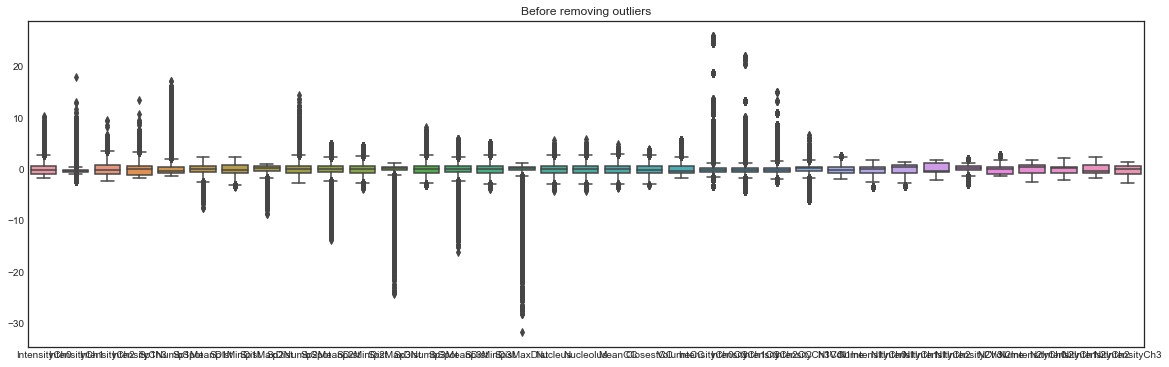

In [6]:
#Boxplot feature before removing outliers
test=newdf.drop(["FociType", "File"], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=test)
plt.title("Before removing outliers")

In [7]:
Data1=pd.DataFrame()
Data1["Foci"] = pd.Categorical(newdf["FociType"])
Data1["File"] = pd.Categorical(newdf["File"])
Data2 = newdf.drop([ "FociType", "File"], axis=1)
Lab = Data2.columns
newdf = pd.DataFrame(stats.mstats.winsorize(Data2, limits=[0.001, 0.001]))
newdf.columns=Lab
newdf.head()

,IntensityCh0,IntensityCh1,IntensityCh2,IntensityCh3,Sp1NumbSpot,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2NumbSpot,Sp2MeanDist,...,N1Volume,N1IntensityCh0,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N2Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3
0,-0.279639,1.066668,1.066709,-1.121278,-0.91181,1.132546,1.463201,0.144658,NaN,NaN,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015
1,-1.177542,0.915853,0.915780,-1.121278,-0.91181,1.132546,1.463201,0.144658,NaN,NaN,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015
2,-1.177542,0.915853,0.915780,-1.121278,NaN,NaN,NaN,NaN,NaN,NaN,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015
3,-1.177542,1.066668,1.066709,-1.121278,NaN,NaN,NaN,NaN,NaN,NaN,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015
4,-1.177542,1.066668,1.066709,-1.121278,NaN,NaN,NaN,NaN,NaN,NaN,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015


Text(0.5,1,u'After removing outliers')

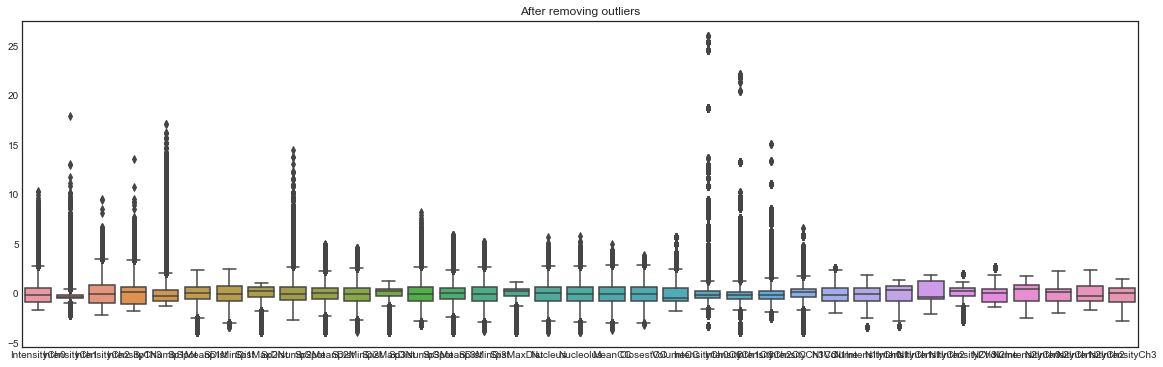

In [8]:
#Features after removing outliers
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=newdf)
plt.title("After removing outliers")

In [9]:
newdf = pd.concat([Data1, newdf], axis=1) #bind categorical and numerical data
del [Data1, Data2]
print(newdf.shape)

(2485727, 37)


## Manage missing data

1. Factorise categorical columns
2. In NumbSpot column NaN means there wasn't a neigbouring point inside 0.2 radius = replace NaN with 0
3. MeanDist, MinDist, MaxDist : NaN in these columns if there is no neibouring point = replace values with 10 (scaled values only go up to 3)

In [10]:
for c in ["Foci", "File"]:
    newdf[c] = pd.factorize(newdf[c])[0]
for c in ["Sp1NumbSpot", "Sp2NumbSpot", "Sp3NumbSpot"]:
    newdf[c] = newdf[c].fillna(0)
for c in ["Sp1MeanDist", "Sp1MinDist", "Sp1MaxDist", "Sp2MeanDist", "Sp2MinDist", "Sp2MaxDist", "Sp3MeanDist", "Sp3MinDist", "Sp3MaxDist"]:
    newdf[c] = newdf[c].fillna(10) 
#Replace other NaN by 0
newdf=newdf.fillna(0)    
newdf.head()

,Foci,File,IntensityCh0,IntensityCh1,IntensityCh2,IntensityCh3,Sp1NumbSpot,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,...,N1Volume,N1IntensityCh0,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N2Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3
0,0,0,-0.279639,1.066668,1.066709,-1.121278,-0.91181,1.132546,1.463201,0.144658,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015
1,0,0,-1.177542,0.915853,0.915780,-1.121278,-0.91181,1.132546,1.463201,0.144658,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015
2,0,0,-1.177542,0.915853,0.915780,-1.121278,0.00000,10.000000,10.000000,10.000000,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015
3,0,0,-1.177542,1.066668,1.066709,-1.121278,0.00000,10.000000,10.000000,10.000000,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015
4,0,0,-1.177542,1.066668,1.066709,-1.121278,0.00000,10.000000,10.000000,10.000000,...,0.558454,0.474763,-1.390866,0.308075,-1.937934,-1.056054,0.045829,-0.620221,0.411624,-1.559015


## Visualise data
(see average and standart deviation of columns)

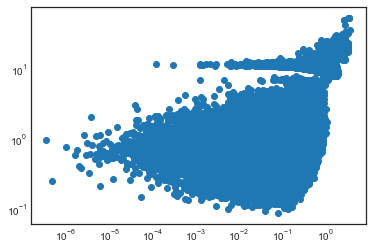

In [17]:
df1 = newdf.drop(['Sp1NumbSpot', 'Sp2NumbSpot', "Sp3NumbSpot", "Foci", "File"], axis=1)
fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(df1.mean(1),df1.var(1))

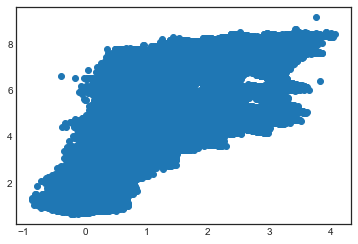

In [18]:
fig,ax = plt.subplots()
ax.scatter(newdf.mean(1), newdf.std(1))

## Visualise data with PCA

In [12]:
#perform PCA transformation
features = newdf.drop(['Foci', 'File'], axis=1)
labels = newdf["Foci"]
pca = PCA(n_components=4)
Y = pca.fit_transform(features)


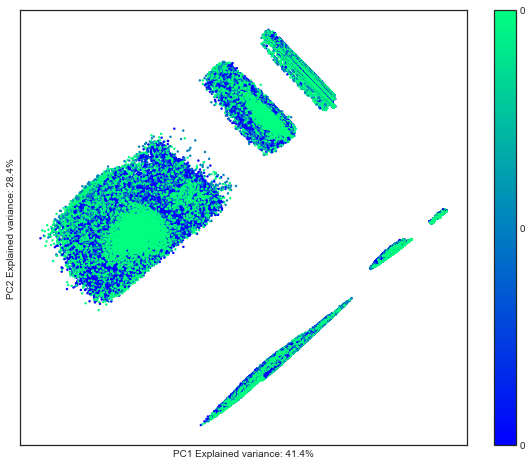

In [20]:
#plot results
fig = plt.figure(figsize=(10, 8))
colors = ["r", "b", "g"]
ax = plt.scatter(Y[:, 0], Y[:, 1], s=2, c=labels.values, cmap="winter")
cbar = plt.colorbar(ax, ticks=range(21))
cbar.ax.set_yticklabels(labels)
ax.set_facecolor('black')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[0]))
plt.ylabel('PC2 Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[1]))
plt.show()

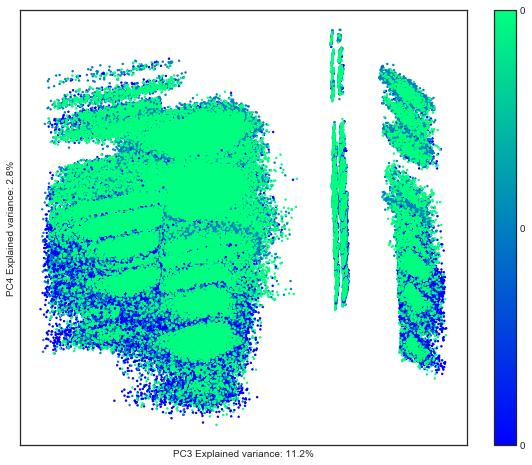

In [16]:
#plot results
fig = plt.figure(figsize=(10, 8))
colors = ["r", "b", "g"]
ax = plt.scatter(Y[:, 2], Y[:, 3], s=2, c=labels, cmap="winter")
cbar = plt.colorbar(ax, ticks=range(21))
cbar.ax.set_yticklabels(labels)
ax.set_facecolor('black')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC3 Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[2]))
plt.ylabel('PC4 Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[3]))
plt.show()

(PCA: There is a higher cluster and there is a lower clustering between foci isoforms)
##Teach the machine to classify different PolII isoforms 

In [19]:
rho, pval=stats.spearmanr(newdf, Y.T[0])
rho=pd.DataFrame(rho)

In [18]:
rho

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.626853e-192,...,2.820408e-108,0.000000e+00,0.000000e+00,0.000000e+00,6.056186e-69,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,1.227380e-01,0.000000e+00,0.000000e+00,3.352771e-217,2.853402e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,1.227380e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.801576e-32,6.218619e-17,6.166160e-10,1.340256e-23,...,4.002121e-37,9.384671e-59,2.307472e-17,3.640215e-41,2.526184e-06,1.527660e-35,3.061908e-33,1.981693e-13,1.044477e-28,5.503613e-29
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.516918e-212,0.000000e+00,3.082317e-24,...,0.000000e+00,0.000000e+00,8.339032e-12,0.000000e+00,1.031200e-18,0.000000e+00,0.000000e+00,1.608501e-266,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.725407e-129,0.000000e+00,2.015161e-13,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.127684e-69
5,0.000000e+00,3.352771e-217,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.309449e-114,9.662705e-20,3.363238e-07,1.365225e-43,...,0.000000e+00,0.000000e+00,3.240312e-46,2.930104e-48,0.000000e+00,0.000000e+00,5.935031e-236,1.691634e-11,4.692266e-112,0.000000e+00
6,0.000000e+00,2.853402e-01,4.801576e-32,0.000000e+00,0.000000e+00,3.309449e-114,0.000000e+00,3.722819e-266,0.000000e+00,0.000000e+00,...,1.280224e-223,3.234094e-94,1.017803e-04,6.999047e-08,3.126021e-73,5.406941e-20,1.032083e-23,1.296886e-09,2.369110e-01,2.131072e-63
7,0.000000e+00,0.000000e+00,6.218619e-17,7.516918e-212,3.725407e-129,9.662705e-20,3.722819e-266,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.109068e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,6.166160e-10,0.000000e+00,0.000000e+00,3.363238e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.386794e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,2.626853e-192,0.000000e+00,1.340256e-23,3.082317e-24,2.015161e-13,1.365225e-43,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.898449e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [120]:
#Seperate features and labels and put them in arrays
#features = newdf.drop(['FociType'], axis=1) #with all the features
features = newdf.drop(['Foci','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab = features.columns
features = features.values
labels = newdf["Foci"].values

In [25]:
##Random Forest classifer
rf = ensemble.RandomForestClassifier(n_estimators=101)
prediction = cross_validation.cross_val_predict(rf, features, labels)

### Check classifier result

0.372111659889
0.372111659889


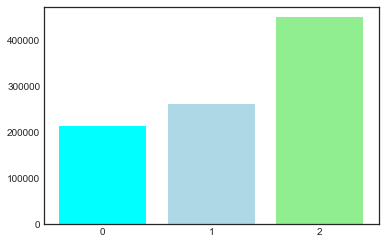

In [26]:
print(prediction == labels).mean()
print(metrics.accuracy_score(labels, prediction))
res = prediction == labels
Sp1=res[labels == 0].sum()
Sp2=res[labels == 1].sum()
Sp3=res[labels == 2].sum()
DiffList=[Sp1, Sp2, Sp3]
x=[0,1,2]
fig,ax = plt.subplots()
plt.bar(x, DiffList, align="center", color= ['cyan', 'lightblue', 'lightgreen'])
ax.set_xticks(x)
plt.show()

### Get importance of features in the model

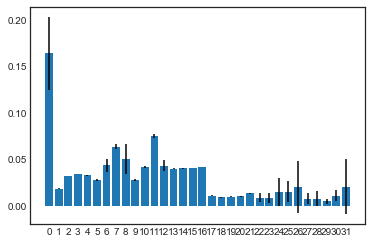

In [121]:
rf = ensemble.RandomForestClassifier()
rf.fit(features, labels.ravel())

importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=Lab, columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.iloc[:, 0]
yerr = importance.iloc[:, 1]

fig,ax = plt.subplots()
plt.bar(x, y, yerr=yerr, align="center")
ax.set_xticks(x)
plt.show()

In [42]:
[x for x,y in zip(Lab,importance["Importance"]) if y>0.04]

['IntensityCh0',
 'Sp2MeanDist',
 'Sp2MinDist',
 'Sp2MaxDist',
 'Sp3MeanDist',
 'Sp3MinDist',
 'Sp3MaxDist',
 'Nucleus',
 'Nucleolus',
 'MeanCC',
 'ClosestCC']

### Classifier result
1. The segmentation is a the a result of intensity difference, so I removed foci intensity columns from features in data set
2. The accuracy score of the random forest classifier is 0.901, which means the classifier was able to predict corretly 90% of the time when intensity columns are added in
3. The accuracy score drops to 0.4 without the intensity features
4. The accuracy score increases to 0.5 when I drop foci == 2 from : sill twice as many errors in Ser2 than in NP
5. To see if we can improve those odds with other classifiers = it takes too much time computational  
6. The highest features discriminating between foci type are: DAPI (highest score), spot distance to Ser2P and Ser5P spots, and to the center of masses of the nucleus, the nucleolus and the CC -> ttest of selected features
7. Check intensity difference between the correct and the wrong predicted spots -> Check wrong predictions

#### Selected features

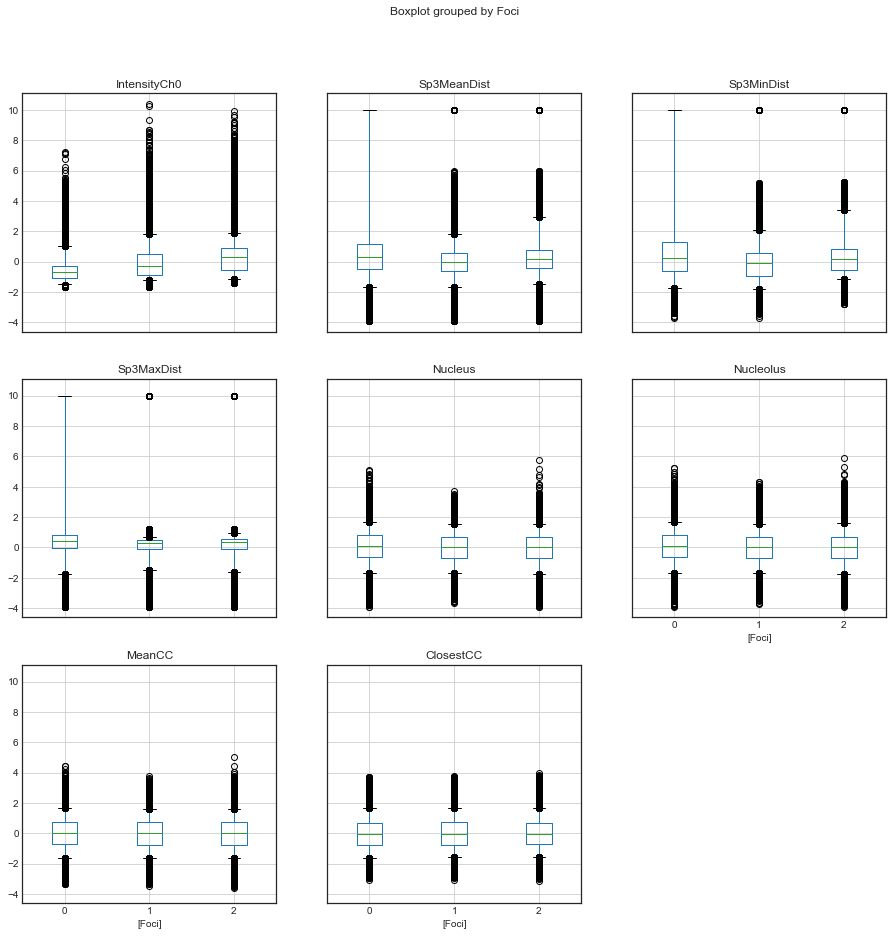

In [93]:
SelectedFeat=[x for x,y in zip(Lab,importance["Importance"]) if y>0.04]
fig = plt.figure(figsize=(30, 25))
axes = newdf.boxplot(column=SelectedFeat, by=['Foci'], whis=[5,95], figsize = [15,15],return_type='axes')
plt.show()

In [79]:
#?stats.spearmanr
Feat=newdf[SelectedFeat]
#rho, pval=stats.spearmanr(newdf, labels)

In [117]:
#newdf.groupby('Foci').MeanCC.hist(alpha=0.4)
two_data = pd.DataFrame(Feat, index=newdf['Foci'])
#t0wo_data.loc[0].head()
pval=stats.ttest_ind(two_data.loc[0], two_data.loc[1], equal_var=False, nan_policy="omit").pvalue
print 'Comb NP-Ser2' ,[x for x,y in zip(SelectedFeat, pval) if y<0.01]
pval=stats.ttest_ind(two_data.loc[0], two_data.loc[2], equal_var=False, nan_policy="omit").pvalue
print 'Comb NP-Ser5',[x for x,y in zip(SelectedFeat, pval) if y<0.01]
pval=stats.ttest_ind(two_data.loc[1], two_data.loc[2], equal_var=False, nan_policy="omit").pvalue
print 'Comb Ser2-Ser5',[x for x,y in zip(SelectedFeat, pval) if y<0.01]

Comb NP-Ser2 ['IntensityCh0', 'Sp3MeanDist', 'Sp3MinDist', 'Sp3MaxDist', 'Nucleus', 'Nucleolus', 'MeanCC', 'ClosestCC']
Comb NP-Ser5 ['IntensityCh0', 'Sp3MeanDist', 'Sp3MinDist', 'Sp3MaxDist', 'Nucleus', 'Nucleolus', 'MeanCC', 'ClosestCC']
Comb Ser2-Ser5 ['IntensityCh0', 'Sp3MeanDist', 'Sp3MinDist', 'Sp3MaxDist', 'Nucleus', 'Nucleolus', 'MeanCC', 'ClosestCC']


#### Wrong prediction : check intensity

       IntensityCh1  IntensityCh2  IntensityCh3
Foci                                           
0True      1.066668      1.066709     -1.121278
0True      0.915853      0.915780     -1.121278
0True      0.915853      0.915780     -1.121278
0True      1.066668      1.066709     -1.121278
0True      1.066668      1.066709     -1.121278


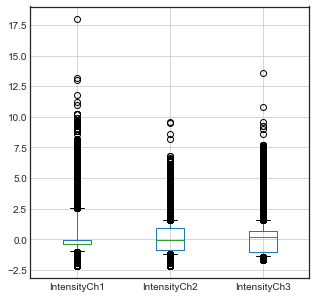

In [146]:
res = prediction == labels
IntensityFeat = ["IntensityCh1", "IntensityCh2", "IntensityCh3"]
Df = newdf[IntensityFeat]
x = newdf.Foci.astype(str)
y = res.astype(str)
z = x.str.cat(y)
Df.index=z
print(Df.head())
fig = plt.figure(figsize=(5, 5))
axes = Df.boxplot(column=["IntensityCh1", "IntensityCh2", "IntensityCh3"], by=None, whis=[5,95], figsize = [15,15],return_type='axes')
plt.show()

C:\Users\Pheonix\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


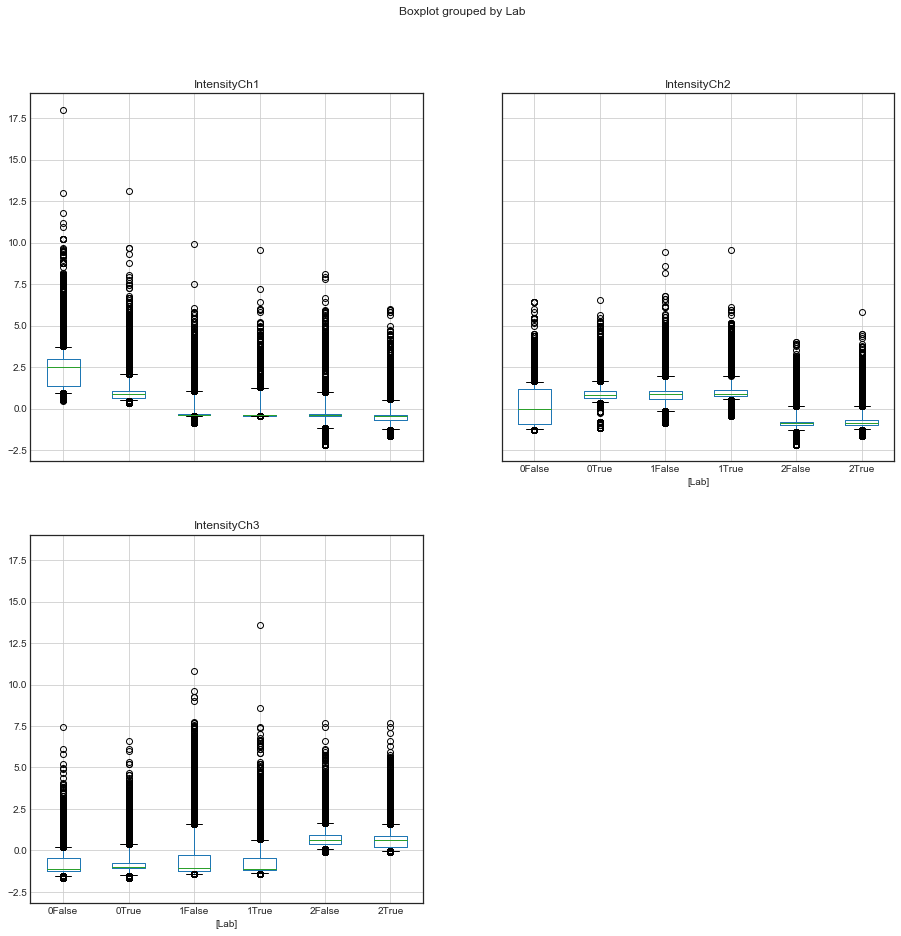

In [147]:
fig = plt.figure(figsize=(20, 30))
Df["Lab"]=Df.index
axes = Df.boxplot(column=["IntensityCh1", "IntensityCh2", "IntensityCh3"], by=["Lab"], whis=[5,95], figsize = [15,15],return_type='axes')
plt.show()

In [145]:
##ttest
pval1=stats.ttest_ind(Df.loc["1True"], Df.loc["1False" ], equal_var=False, nan_policy="omit").pvalue
pval2=stats.ttest_ind(Df.loc["2True"], Df.loc["2False"], equal_var=False, nan_policy="omit").pvalue
pval=stats.ttest_ind(Df.loc["0True"], Df.loc["0False"], equal_var=False, nan_policy="omit").pvalue
res=pd.DataFrame([pval, pval1, pval2])
res.index=["NP", "Ser2", "Ser5"]
res.columns=["IntensityCh1", "IntensityCh2", "IntensityCh3"]
res

,IntensityCh1,IntensityCh2,IntensityCh3
NP,0.000000e+00,0.0,0.0
Ser2,1.449036e-167,0.0,0.0
Ser5,0.000000e+00,0.0,0.0


# Regression

- Can we predict DAPI intensity with the other features
- This method will answer  the question: is there a pattern in RNA PolII distribution in regards to DNA content
- I use ElasticNetCV for regression

### MeanCC prediction:  

In [149]:
#from scipy import stats
mOTUs=newdf.drop(["MeanCC", "File"] , axis=1)
label = newdf["MeanCC"]
#ranked = np.array([stats.rankdata(mOTUs.iloc[i]) for i in range(len(mOTUs))])

In [ ]:
predictor = linear_model.ElasticNetCV(n_jobs=4)
Foci=newdf["Foci"].values
cv = cross_validation.LeaveOneLabelOut(labels=Foci)
prediction = cross_validation.cross_val_predict(predictor, np.array(mOTUs), label, cv=cv)
print("R2: {}".format(metrics.r2_score(label, prediction)))

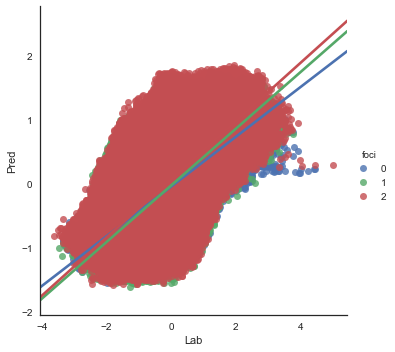

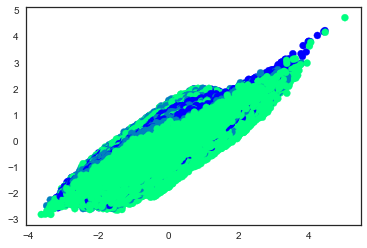

In [228]:
#fig, ax = plt.subplots()
#ax.scatter(label,prediction)
#ax.plot([0,5], [0,5],'k:')
#residuals =[label[i]-prediction[i] for i in range(len(label))]
df=pd.DataFrame({"Lab":label, "Pred":prediction})
df["res"] = df["Lab"].subtract(df["Pred"])
df["foci"] = newdf["FociType"]
sns.lmplot("Lab","Pred",data=df, hue="foci")
fig, ax = plt.subplots()
ax.scatter(df["Lab"],df["res"], c=df["foci"], cmap="winter")
#sns.lmplot("Res","Lab",data=df, hue="Foci")

### Intensity DAPI prediction


In [ ]:
#Set up data
mOTUs=newdf.drop(["IntensityCh0", "File"] , axis=1)
label = newdf["IntensityCh0"]
ranked = np.array([stats.rankdata(mOTUs.iloc[i]) for i in range(len(mOTUs))])
#Predict
predictor = linear_model.ElasticNetCV(n_jobs=4)
Foci=newdf["Foci"].values
cv = cross_validation.LeaveOneLabelOut(labels=Foci)
prediction = cross_validation.cross_val_predict(predictor, ranked, label, cv=cv)
print("R2: {}".format(metrics.r2_score(label, prediction)))
#plot predicted vs expected data

# Problem: can we build a model that can generalize across studies?

Big issues

- Not the same technology (Illumina vs 454 and different library preps)
- Not the same sequencing depth

![Q](Q.png) Suggestions?